## Install requirements

In [1]:
!pip install emcee

Looking in indexes: https://repository.overstock.com/repository/python-group/simple


In [2]:
!pip install astropy

Looking in indexes: https://repository.overstock.com/repository/python-group/simple


In [3]:
!pip install scipy

Looking in indexes: https://repository.overstock.com/repository/python-group/simple


In [4]:
import numpy as np
import pandas as pd
import scipy.integrate as int
import scipy.optimize as op
import emcee
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.constants as const
import sys
from astropy.cosmology import wCDM
from astropy.cosmology import FlatLambdaCDM

In [5]:
def normal(x, A, mu, sigma):
    return A*np.exp(-1/2*(mu-x)**2/sigma**2)

def line(x, a, b):
    return a*x+b

In [6]:
z = [0.6304, 0.295, 0.295, 0.4546, 0.745, 0.6575, 0.311, 0.597, 0.54]
h0 = [71, 78.2, 77.1, 71.7, 68.9, 71.6, 81.1, 74.2, 64.8]
h0err = [3.3, 3.4, 7.3, 4.8, 5.4, 4.9, 8.0, 3, 4.4]

In [7]:
# best fit line
popt, pcov = op.curve_fit(line, z, h0, sigma=h0err)
popt

array([-18.94887255,  82.8294604 ])

In [8]:
h0range = np.linspace(50, 100, 300)

In [9]:
pdf = normal(h0range, 1, 77.1, 7.3)*normal(h0range, 1, 71, 3.3)*normal(h0range, 1, 78.2, 3.4)*normal(h0range, 1, 71.7, 4.8)*normal(h0range, 1, 68.9, 5.4)*normal(h0range, 1, 71.6, 4.9)*normal(h0range, 1, 81.1, 8)
pdf2 = pdf*normal(h0range,1, 74.2, 3)*normal(h0range, 1, 64.8, 4.4)

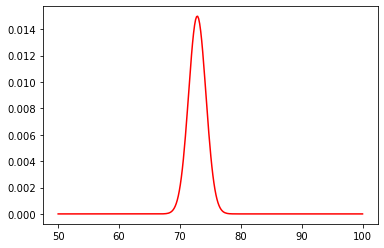

In [10]:
plt.plot(h0range, pdf2, 'r-')
plt.show()

In [11]:
popt, pcov = op.curve_fit(normal, h0range, pdf2, p0=[1, 73, 3])
popt

array([1.49957929e-02, 7.28466464e+01, 1.42157872e+00])

In [12]:
# generating mocks
iter = 10000
mean = 72.85
lens1 = np.random.normal(mean, 3.3, iter)
lens2 = np.random.normal(mean, 3.4, iter)
lens2b = np.random.normal(mean, 7.3, iter)
lens3 = np.random.normal(mean, 4.8, iter)
lens4 = np.random.normal(mean, 5.4, iter)
lens5 = np.random.normal(mean, 4.9, iter)
lens6 = np.random.normal(mean, 8.0, iter)
lens7 = np.random.normal(mean, 3, iter)
lens8 = np.random.normal(mean, 4.4, iter)

In [13]:
output = []
for i in np.arange(0, iter, 1):
    print(i)
    
    h0mock = [lens1[i], lens2[i], lens2b[i], lens3[i], lens4[i], lens5[i], lens6[i], lens7[i], lens8[i]]
    
    
    popt, pcov = op.curve_fit(line, z, h0mock, sigma=h0err)
    print(popt)
    output.append(popt)

output = np.array(output)

0
[-16.35012565  81.15347077]
1
[-2.8587603  76.86514607]
2
[-3.73334126 75.09114466]
3
[ 9.62818219 67.1486905 ]
4
[ 9.88353116 63.91984696]
5
[-5.48842269 76.44604899]
6
[ 1.1823208  71.34332318]
7
[ 5.73788572 68.27710643]
8
[ 4.95521613 67.8884272 ]
9
[ 7.06050185 69.7566093 ]
10
[-5.28799412 78.2257322 ]
11
[ 4.54900249 72.25372792]
12
[-2.48459693 73.16384464]
13
[ 9.87850321 68.20353788]
14
[-1.62982128 74.71586156]
15
[-8.25508945 77.99871111]
16
[11.25306039 69.79807519]
17
[ 3.90956946 70.04299272]
18
[-5.09049232 74.20988596]
19
[-10.77742028  78.78600339]
20
[ 4.54580035 66.97223235]
21
[ 2.16305502 69.17882124]
22
[ 8.44629986 68.87791296]
23
[ 0.8678351  74.03629936]
24
[ 6.49500505 70.20398673]
25
[ 3.57293692 70.77084166]
26
[-4.54570006 72.11010532]
27
[15.59410876 63.98779218]
28
[16.81377387 63.00270384]
29
[ 6.91258601 68.68346021]
30
[-2.4512021  76.80868429]
31
[ 3.38717021 70.2325065 ]
32
[10.59183079 67.57306647]
33
[ 3.61899305 72.19336635]
34
[ 2.7809036  70.7

[-10.159843    77.52044143]
587
[-9.92287972 77.96246061]
588
[-8.75595664 77.71861971]
589
[15.23539876 66.50256812]
590
[-8.11360901 76.91503533]
591
[-9.36527273 77.68272049]
592
[13.99337348 65.10486286]
593
[-13.47976931  81.02927603]
594
[-19.69469903  82.80707434]
595
[-1.77889543 72.79258645]
596
[ 3.10998514 72.66333434]
597
[-12.18525194  80.79982079]
598
[ 6.13380835 69.00601657]
599
[14.97757763 64.62783458]
600
[-13.77789374  82.53844605]
601
[-13.91833196  80.71423586]
602
[-8.6872221  75.76736926]
603
[-6.18976433 74.427453  ]
604
[ 1.79772902 71.36339389]
605
[-5.11068828 75.16601485]
606
[-7.38667027 78.93488233]
607
[-0.73934985 74.75062512]
608
[ 9.76196928 67.82534731]
609
[ 3.48192029 73.06021735]
610
[-14.31854077  82.14653745]
611
[ 0.88963112 72.29870931]
612
[-1.29778113 73.41926866]
613
[-1.87178608 74.41014131]
614
[ 5.38355873 68.28253587]
615
[-1.67969602 74.45097244]
616
[11.97907138 67.4725966 ]
617
[ 4.64362127 68.59305976]
618
[-11.37500899  79.55851051

1086
[ 6.04126904 70.89423124]
1087
[10.86374513 67.58404564]
1088
[-3.34116037 73.32320809]
1089
[13.5657299  67.10555962]
1090
[13.11862579 66.94068495]
1091
[ 9.74908373 66.87421614]
1092
[-7.79125276 76.04852559]
1093
[-0.10832068 73.60001727]
1094
[-11.12475136  78.46796926]
1095
[-3.53688086 74.7808793 ]
1096
[-1.03293411 70.88232353]
1097
[-6.62805621 72.48085356]
1098
[-6.80719276 75.83939215]
1099
[-5.75840896 76.98871018]
1100
[-19.67727114  84.28647952]
1101
[ 0.90764361 70.75357479]
1102
[-8.32250245 76.64677045]
1103
[-16.49798839  82.04589268]
1104
[-4.50674038e-02  7.28752658e+01]
1105
[-14.66099882  80.86626215]
1106
[ 1.4821922  72.41138354]
1107
[ 6.7445382  70.46595255]
1108
[-7.82839564 77.45730206]
1109
[-15.84360554  80.85683201]
1110
[ 0.69864097 72.29188614]
1111
[-5.88588297 75.78871378]
1112
[-7.62541886 79.06623339]
1113
[-4.8001757  74.68121392]
1114
[-6.7495387  77.32343782]
1115
[15.58668215 67.40015662]
1116
[ 3.45836212 68.38145134]
1117
[-2.35410092 72.

1586
[-2.11272497 74.76818235]
1587
[-9.91843092 78.12521118]
1588
[17.30399722 64.53582928]
1589
[ 8.99151615 67.66383913]
1590
[-7.91190344 78.25748159]
1591
[ 4.09420769 71.37949596]
1592
[-4.73633581 75.95021536]
1593
[ 7.59134783 68.91731329]
1594
[ 2.70407149 73.70799618]
1595
[-0.14739076 74.26637784]
1596
[ 6.56473259 68.44317812]
1597
[-15.43667693  82.10632751]
1598
[-16.75308552  81.04768739]
1599
[ 9.0655042  70.63318806]
1600
[ 9.41702176 67.41769671]
1601
[ 3.01431776 72.43100936]
1602
[ 4.83690981 71.14509142]
1603
[-13.49842597  79.45158401]
1604
[ 8.64526626 65.75359696]
1605
[-7.6658988 76.6824478]
1606
[ 8.50608787 68.78808026]
1607
[-0.10964738 76.12721649]
1608
[16.21702644 64.97409802]
1609
[-5.33540888 76.89489925]
1610
[-3.01146763 76.95881052]
1611
[-11.74931628  79.20513141]
1612
[ 5.71544859 67.67806542]
1613
[ 7.34349098 67.88926573]
1614
[-14.81348723  82.89076496]
1615
[-5.03817309 73.79744022]
1616
[10.41813181 65.61254742]
1617
[10.75507688 68.13206015]


[12.09478825 66.98721704]
2086
[ 9.27284646 68.79703985]
2087
[13.97389326 66.23872249]
2088
[-9.09365108 76.75805883]
2089
[14.00141548 64.77988868]
2090
[-12.81610135  78.39925717]
2091
[ 8.37012669 68.63273048]
2092
[ 2.70410776 71.08647658]
2093
[12.15917204 66.90533844]
2094
[ 3.5698299  69.53976573]
2095
[-2.03577807 71.47218805]
2096
[-11.75191879  80.12639828]
2097
[-18.14796714  83.24319794]
2098
[-15.88903327  81.9063907 ]
2099
[17.42373962 61.02240628]
2100
[-13.54523141  77.68920365]
2101
[ 4.50679354 71.36581208]
2102
[15.90346676 63.57322303]
2103
[-1.69172088 73.16387176]
2104
[ 1.77513915 72.58985236]
2105
[ 4.00378564 70.51075537]
2106
[-1.74067867 73.05022225]
2107
[ 4.59676067 73.32473049]
2108
[-5.80742133 77.04950434]
2109
[ 5.69303985 70.85050854]
2110
[23.01312748 61.77875248]
2111
[18.02869269 65.32301349]
2112
[-1.25385927 76.32904885]
2113
[-7.60967699 80.48498189]
2114
[-0.24454629 71.72748994]
2115
[ 1.38343227 73.14496903]
2116
[11.23158669 66.03630223]
211

[ 5.65468252 71.6369814 ]
2586
[-21.38258279  86.36717682]
2587
[15.52789563 64.9456731 ]
2588
[-6.67249284 77.43193645]
2589
[ 1.2328437  71.40465794]
2590
[-8.66103443 74.53394562]
2591
[-0.19165704 74.01412718]
2592
[-4.31026907 74.17513693]
2593
[-3.21495481 74.46482088]
2594
[ 7.64354624 68.68261103]
2595
[ 1.10782873 74.18494286]
2596
[-8.34097782 76.62867628]
2597
[-15.70314156  81.58453533]
2598
[-6.13325359 75.91770986]
2599
[-8.53171893 79.29907311]
2600
[ 4.3619302  69.81004376]
2601
[-14.14558159  83.88889822]
2602
[-7.44408717 77.04576679]
2603
[ 3.86135179 70.28032049]
2604
[10.57282557 68.09109311]
2605
[-0.31315208 73.23656641]
2606
[11.90299302 69.84343899]
2607
[-11.44601447  78.66233373]
2608
[-6.66410281 76.05770089]
2609
[13.24029716 65.94200106]
2610
[ 2.69348373 71.47910447]
2611
[ 3.13371648 68.72807221]
2612
[-2.70658424 75.10923147]
2613
[-16.0553352  81.551059 ]
2614
[-5.95037585 74.46004888]
2615
[-7.77870905 76.4049682 ]
2616
[-15.93628889  80.37409552]
261

3085
[-17.12530437  82.38551611]
3086
[-15.98362942  82.09506116]
3087
[-3.47962595 75.39444701]
3088
[ 3.01821094 69.66872562]
3089
[-6.93863245 77.04317752]
3090
[14.29545133 66.32806228]
3091
[ 3.38680903 71.43480227]
3092
[-2.02895239 77.06945896]
3093
[21.43517888 62.16688827]
3094
[-9.23999741 79.39077607]
3095
[-3.91577356 75.36540187]
3096
[13.45533116 64.15802072]
3097
[-11.97527688  80.43776873]
3098
[-1.96020274 75.56630556]
3099
[ 4.1886735  70.05455375]
3100
[-8.79634209 78.81567795]
3101
[-10.51808677  79.09393963]
3102
[ 0.12070575 73.9867596 ]
3103
[ 1.90770526 73.7677552 ]
3104
[ 9.21960094 66.88756467]
3105
[ 0.50746664 70.36546973]
3106
[11.6690205  67.51355425]
3107
[ 4.24266193 72.78183191]
3108
[-14.28210369  78.85566652]
3109
[ 0.52501848 74.23470772]
3110
[-18.76697015  84.68774586]
3111
[ 8.29661374 68.39057582]
3112
[-7.52338866 76.36367266]
3113
[ 1.24767855 70.51134609]
3114
[16.7438714  64.49454205]
3115
[12.81522407 63.89515646]
3116
[16.52508599 64.451098

3585
[-9.53854124 80.33228833]
3586
[ 1.2077791  70.79810248]
3587
[-7.91553439 78.35091528]
3588
[ 5.24927477 68.21940945]
3589
[-7.08173046e-02  7.15410424e+01]
3590
[-0.34917908 72.11566366]
3591
[-0.52684361 73.20205422]
3592
[ 5.61528444 69.79672674]
3593
[-0.58996054 72.25915598]
3594
[ 2.47363937 72.1985866 ]
3595
[ 8.22485987 66.21853849]
3596
[ 3.52804082 68.97595651]
3597
[-6.55237184 79.28888783]
3598
[ 0.59860774 71.97161729]
3599
[-10.5296785   78.74946781]
3600
[-7.56856484 77.64382003]
3601
[10.31614359 64.83098604]
3602
[-2.68815402 71.77194131]
3603
[-5.53795342 74.59806556]
3604
[16.00233591 66.80632524]
3605
[18.38890585 63.56039291]
3606
[-0.94105258 73.24721357]
3607
[ 3.31064475 71.51508589]
3608
[-23.40763316  84.4299904 ]
3609
[13.74667351 67.48363591]
3610
[-2.21537835 73.08748766]
3611
[-15.18389751  82.08030948]
3612
[14.70008657 65.40391297]
3613
[10.73804518 67.22544177]
3614
[10.56386887 66.27783533]
3615
[-12.62911714  80.61807623]
3616
[-4.08735838 71.76

4085
[ 7.26147656 70.55251694]
4086
[-10.49603605  80.41939091]
4087
[-1.14977708 70.28272848]
4088
[-5.38579168 76.14937958]
4089
[12.8134806  67.83183522]
4090
[-15.5882529   82.57367704]
4091
[-9.28920398 76.42930772]
4092
[ 8.76798191 67.03005736]
4093
[-17.6211083   80.98352817]
4094
[-4.53565269 75.6048376 ]
4095
[-12.23943043  80.48215854]
4096
[-7.4881573  76.77697702]
4097
[-16.0362009   81.83818941]
4098
[ 7.65053224 71.76161493]
4099
[ 1.13382067 72.24585136]
4100
[13.79793351 67.13730647]
4101
[-2.74030139 75.56412024]
4102
[ 7.10072691 68.69646191]
4103
[ 6.1934339  68.59376946]
4104
[18.91556882 63.49399719]
4105
[-0.09021838 75.26955654]
4106
[ 3.2071933  68.90032231]
4107
[-0.75439676 73.7484343 ]
4108
[-0.331995   71.99609763]
4109
[ 5.83061593 68.16004503]
4110
[-10.89683173  76.73146371]
4111
[18.79654526 62.83438796]
4112
[-10.85646879  81.41546304]
4113
[-6.59098014 76.45704405]
4114
[ 5.33872254 71.475272  ]
4115
[-5.10302378 76.00022436]
4116
[-19.92073361  81.43

[ 9.79051779 68.54546921]
4595
[-2.67238352 73.78041167]
4596
[-2.06490921 75.99291386]
4597
[-13.55394128  81.71756697]
4598
[ 6.80463728 67.56664831]
4599
[ 5.61449622 70.33675095]
4600
[17.40103748 67.10282217]
4601
[-14.42155138  81.99267122]
4602
[-16.83547018  84.96400742]
4603
[-20.2375123   82.43921247]
4604
[-2.63392216 73.49901294]
4605
[11.99249694 67.73872242]
4606
[-11.7936289   77.67285155]
4607
[ 0.69731196 70.71850557]
4608
[11.72893286 67.32446516]
4609
[ 4.96169365 71.55432446]
4610
[ 2.52073613 71.95366907]
4611
[11.19674083 67.53634513]
4612
[ 8.66566976 67.61678621]
4613
[16.08741501 64.77111536]
4614
[-7.02742556 76.83887088]
4615
[-12.85278047  77.98752884]
4616
[12.66284965 68.50062362]
4617
[-2.63220304 77.1938605 ]
4618
[ 8.3564131  68.98633536]
4619
[-25.74039069  84.98223007]
4620
[-25.48100807  86.10943664]
4621
[-1.06367607 74.52844881]
4622
[-4.78476378 72.8165649 ]
4623
[11.46094813 66.47729796]
4624
[1.05894098e-02 7.32947910e+01]
4625
[-5.77975239 73.5

[ 1.62074555 73.80781682]
5093
[-3.79987576 74.17040139]
5094
[-16.08163663  80.4508907 ]
5095
[-6.59030364 76.71087317]
5096
[ 1.16867841 72.01908237]
5097
[-2.70246918 73.15196764]
5098
[ 2.14594096 71.36728957]
5099
[-10.37271979  77.02630951]
5100
[ 1.44859418 69.40062198]
5101
[-2.92322506 74.67285425]
5102
[ 2.89798309 72.27504165]
5103
[-5.51158241 75.93234495]
5104
[-13.65591194  79.54332044]
5105
[-2.40943295 74.33846659]
5106
[ 3.18757152 73.67841706]
5107
[ 8.64660901 69.54830439]
5108
[-11.81490207  80.43960135]
5109
[-0.66425844 72.35865205]
5110
[12.14316857 67.64955495]
5111
[ 0.13902917 74.21094901]
5112
[14.60621742 65.62492842]
5113
[ 1.74176769 70.02764767]
5114
[-0.43508277 74.19847031]
5115
[ 1.92660022 73.53455847]
5116
[23.42263663 61.93750503]
5117
[12.94455465 67.48813381]
5118
[ 3.12968283 71.10370407]
5119
[15.67491225 64.68594708]
5120
[ 4.31261105 70.84081781]
5121
[ 9.28078339 67.24471375]
5122
[-15.57112919  81.79629718]
5123
[ 3.50744348 68.97225341]
512

[-0.17376527 72.3038826 ]
5794
[20.00136285 60.57754975]
5795
[-2.53663775 74.54330998]
5796
[31.56398411 54.73445537]
5797
[ 0.44398146 71.8045812 ]
5798
[-4.44846042 75.79558344]
5799
[ 4.77791646 71.44406112]
5800
[-0.8426487  73.79136532]
5801
[12.77530487 66.15404136]
5802
[-9.53326359 80.28717308]
5803
[-8.90364794 76.95897639]
5804
[ 5.84896041 70.64433032]
5805
[11.57856775 66.85116556]
5806
[-3.10137481 75.26160416]
5807
[ 4.356509   68.76097848]
5808
[-2.72899593 71.76629508]
5809
[-0.60677968 74.37112874]
5810
[ 4.49657043 71.19765197]
5811
[-2.13180255 71.5046114 ]
5812
[16.51556659 64.81752086]
5813
[-5.78293881 76.50348656]
5814
[-10.07721882  76.7975371 ]
5815
[15.10565709 64.98395795]
5816
[ 6.19636594 71.09866937]
5817
[-4.35468989 73.79182925]
5818
[-10.59413238  75.90164688]
5819
[-0.71419225 74.80186808]
5820
[10.13427268 68.0848668 ]
5821
[ 7.26401496 67.84222267]
5822
[-7.9262253  77.45260899]
5823
[-3.75743556 76.32554541]
5824
[-10.81365764  78.76610141]
5825
[-

[-2.85957893 71.81961286]
6319
[-2.24388521 74.003884  ]
6320
[-6.36391663 77.48439899]
6321
[ 0.75108583 74.73277614]
6322
[-13.79110252  80.65215055]
6323
[ 7.54340616 69.51507222]
6324
[-3.45030534 75.14802574]
6325
[-13.06251059  79.39028029]
6326
[18.30300085 65.04219865]
6327
[ 4.17466683 71.73903262]
6328
[-0.43912582 73.10371347]
6329
[16.99188249 62.21072254]
6330
[ 1.25665441 73.82652315]
6331
[-9.67067021 78.06676592]
6332
[10.67884225 68.74259511]
6333
[-9.02411859 75.72611419]
6334
[15.44023222 62.04792889]
6335
[-3.03545805 75.81788225]
6336
[ 5.28914546 71.24342503]
6337
[ 4.85530586 69.53927525]
6338
[ 8.03740663 68.73480443]
6339
[-9.93419479 80.47699951]
6340
[13.34831722 65.05793499]
6341
[-10.18156901  77.49997536]
6342
[-7.11880519 76.51255972]
6343
[ 7.89100441 71.47741456]
6344
[ 8.04280149 68.13134398]
6345
[ 9.33126897 69.67954292]
6346
[-3.79301227 74.16249688]
6347
[-8.60680696 77.23267047]
6348
[ 2.41324749 70.21624031]
6349
[ 0.27808949 74.05633062]
6350
[-

6833
[-3.86568878 75.53795763]
6834
[-9.89667494 79.81649321]
6835
[-20.72275474  83.61184144]
6836
[-6.3464941  74.89115106]
6837
[-3.42368359 75.24182929]
6838
[-2.093784   73.22301671]
6839
[ 0.38750943 73.96165336]
6840
[-25.53159456  84.65451663]
6841
[ 7.19560328 69.74699302]
6842
[-1.25363135 72.17313831]
6843
[-4.87537608 72.83218997]
6844
[21.94227007 60.63655625]
6845
[-10.80267896  80.71300689]
6846
[ 4.38890666 67.78166511]
6847
[ 8.31482289 67.67878513]
6848
[-4.40651067 77.00649805]
6849
[-6.8474222  77.29353833]
6850
[ 5.81029426 68.04626051]
6851
[ 0.84422348 72.83567281]
6852
[12.690152   65.76481115]
6853
[-7.85418986 75.08969635]
6854
[19.83268246 65.48706456]
6855
[-22.25077787  87.0119543 ]
6856
[-20.76603954  84.19071577]
6857
[ 3.3752243 70.8358454]
6858
[ 2.36023397 71.22883685]
6859
[ 8.56056397 67.27041558]
6860
[11.75633124 65.56175948]
6861
[ 8.62109548 70.16836613]
6862
[ 0.92619345 70.75606722]
6863
[-9.81947705 76.94580811]
6864
[-2.30182314 74.79894601]


[-1.17409228 72.31053195]
7343
[-0.71675762 74.45019324]
7344
[-2.98620069 76.06713268]
7345
[ 1.21556307 72.220952  ]
7346
[ 1.58399692 75.15893207]
7347
[-10.32330609  77.38061111]
7348
[-18.9602224  84.5700583]
7349
[ 1.71996085 69.55497733]
7350
[19.31207654 59.71681748]
7351
[-12.02654136  79.54535526]
7352
[-5.69777111 76.38176416]
7353
[-15.98257944  82.34849053]
7354
[10.09383096 64.22441211]
7355
[ 1.63696092 71.70797313]
7356
[ 4.03454885 74.9463692 ]
7357
[ 4.41911069 69.2405503 ]
7358
[21.61327605 63.43156659]
7359
[-11.0912056   79.01958638]
7360
[-3.49253961 74.28824024]
7361
[ 1.75409748 72.35489983]
7362
[-11.0739508   79.51806845]
7363
[-7.08678691 76.38076654]
7364
[-1.83717484 72.24165494]
7365
[13.04116246 67.29158289]
7366
[-5.66901786 74.81633947]
7367
[ 1.21408339 74.3959235 ]
7368
[-1.11960186 71.86648012]
7369
[ 4.06213259 70.3610792 ]
7370
[ 4.87814579 69.25510974]
7371
[11.81840492 63.49684721]
7372
[-17.22612342  81.16332597]
7373
[10.17940055 69.73035494]
7

[-1.42311205 72.72510185]
7884
[-17.16702533  80.89666637]
7885
[-11.14198086  78.74646156]
7886
[ 9.80563786 68.23799912]
7887
[-25.67767285  86.73350881]
7888
[-14.38951936  81.51654992]
7889
[ 3.71332601 73.10866609]
7890
[ 5.9220596  71.73423293]
7891
[-4.44992691 76.63455487]
7892
[ 8.45478382 66.52748775]
7893
[-0.6386857  72.66608832]
7894
[11.81538198 66.40803823]
7895
[-6.66200016 77.5703411 ]
7896
[11.62188897 67.34853036]
7897
[-8.40838439 76.68235051]
7898
[5.47017840e-02 7.21816651e+01]
7899
[23.12421153 61.1264537 ]
7900
[-4.82004632 76.42135306]
7901
[-9.75898122 78.1553461 ]
7902
[ 0.09666124 75.28625852]
7903
[13.67273066 65.84893083]
7904
[-15.25271577  81.24231469]
7905
[-10.4933558   77.88120149]
7906
[ 8.22806469 68.45031707]
7907
[-15.46801761  81.57166963]
7908
[-3.68224    73.95871976]
7909
[ 1.24403728 73.22954809]
7910
[-2.07272143 74.67931562]
7911
[ 1.31238603 71.74512179]
7912
[ 2.77447203 70.7987126 ]
7913
[-6.19874841 74.96984202]
7914
[-10.17825549  79.3

[-1.67656557 72.08018901]
8423
[11.99300389 64.59798124]
8424
[10.961515  67.0826595]
8425
[10.01954909 67.33484682]
8426
[-2.7824695  74.32703386]
8427
[13.46867709 67.11934862]
8428
[ 2.59953426 71.16896239]
8429
[-2.30086803 72.51195084]
8430
[ 4.88681487 68.01515541]
8431
[-0.09127077 75.00791682]
8432
[ 7.59991725 66.57393625]
8433
[ 3.88946124 70.914976  ]
8434
[ 9.04778545 70.98548634]
8435
[ 2.67548701 71.18423021]
8436
[13.60169578 67.05948153]
8437
[-5.85598244 76.56307194]
8438
[-10.14733011  78.70346563]
8439
[10.33498857 68.46006994]
8440
[ 3.73828971 71.03471349]
8441
[ 6.77784374 70.11174868]
8442
[-5.01347465 75.28100127]
8443
[ 0.8416463  69.56624133]
8444
[-2.01457491 73.43238515]
8445
[19.0155924  61.10185739]
8446
[13.29490995 67.03104474]
8447
[ 7.36950392 69.14992469]
8448
[ 4.27195559 68.87728746]
8449
[-6.50476744 78.26137775]
8450
[-1.21639376 72.96077881]
8451
[-0.62268592 71.10936626]
8452
[-10.41037162  76.57085882]
8453
[-4.44535773 73.44902045]
8454
[-1.11

[-15.4316848   79.73378182]
8954
[-5.13972242 74.75053217]
8955
[-4.14888383 75.95073454]
8956
[-7.71792847 76.42026032]
8957
[ 4.31716857 73.40254073]
8958
[ 4.40094722 70.93304369]
8959
[ 6.43936843 68.86322701]
8960
[21.64363583 59.11183551]
8961
[-16.46010002  81.04878615]
8962
[13.38117124 63.748342  ]
8963
[ 5.51231249 70.68982602]
8964
[-19.17152151  84.04131364]
8965
[ 0.10261853 72.01128519]
8966
[ 8.48906973 69.28987202]
8967
[-5.31858746 76.53534708]
8968
[-2.87122669 73.76189482]
8969
[10.54522932 65.85970783]
8970
[13.42773055 64.80102072]
8971
[-7.19853201 77.46603154]
8972
[-11.79338191  77.79935644]
8973
[-1.02915926 71.95104854]
8974
[ 2.56888317 70.67196002]
8975
[-11.93432074  78.63306112]
8976
[-2.0331177  73.87314651]
8977
[-5.56992555 76.69260134]
8978
[-11.00349077  80.70221684]
8979
[20.96670551 60.76428917]
8980
[11.5230536  66.88725833]
8981
[ 6.80331648 68.30529674]
8982
[ 8.04217269 71.6460195 ]
8983
[-4.35234011 72.45956019]
8984
[-11.99434113  79.38322227]

[-2.18663374 75.13693122]
9477
[ 5.55382394 69.83609428]
9478
[ 3.54901938 72.02697555]
9479
[-9.67228615 76.89490841]
9480
[-2.52960043 74.59927794]
9481
[-0.80397109 71.37903996]
9482
[-17.29993945  83.03597527]
9483
[-16.9580754   80.75132244]
9484
[-6.30548758 76.85103158]
9485
[-4.65734097 73.53199481]
9486
[-2.60927345 75.5506892 ]
9487
[-7.05113977 75.8414641 ]
9488
[-14.93659212  82.01665496]
9489
[29.25667738 57.81001284]
9490
[ 5.12213029 70.43318556]
9491
[-0.1570647  69.87981341]
9492
[ 4.14252323 71.21531731]
9493
[-3.92670284 77.90065906]
9494
[-6.78895865 75.02841906]
9495
[-1.12216561 72.3691413 ]
9496
[-6.63031307 73.40020579]
9497
[-8.62648533 77.18139915]
9498
[-5.25927834 74.14681595]
9499
[-8.22577343 77.24088478]
9500
[-19.38201694  82.54096688]
9501
[-6.38792005 74.15809835]
9502
[-10.13221687  77.60089218]
9503
[-13.58004007  80.45784562]
9504
[-18.19719715  83.61739187]
9505
[ 8.62526404 67.27943757]
9506
[ 9.54175409 69.2443502 ]
9507
[ 3.62485178 71.93624747]

[ 0.2197333  70.34020244]


In [14]:
len(output[output[:,0]<-18.94887255])/iter

0.0272

In [15]:
len(output[output[:,1]>82.87075323])/iter

0.0307